## Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x ** 2 + x + 1

In [3]:
# Generate data
x_1 = np.linspace(start=-3, stop=3, num=100)

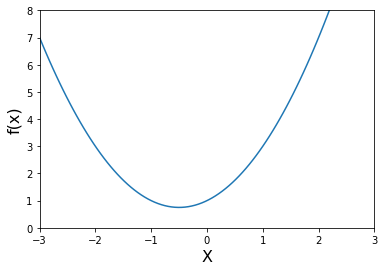

In [4]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

In [5]:
def df(x):
    return 2 * x + 1

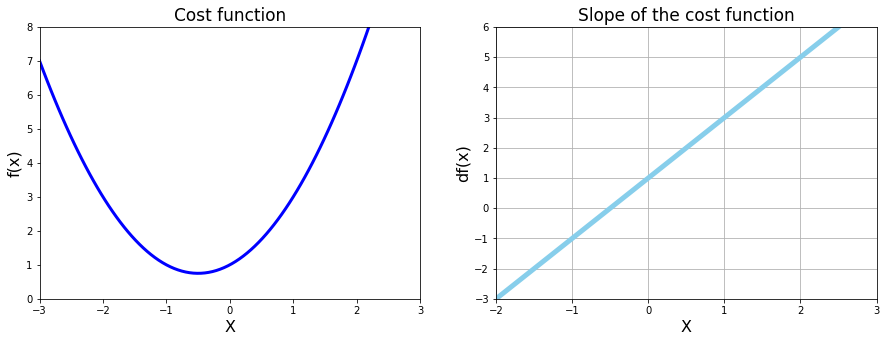

In [6]:
# Plot function and derivative side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
# subplot(no_of_row, no_of_col, index)
plt.subplot(1, 2, 1)

plt.xlim([-3, 3])
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.grid()
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

## Python Loops & Gradient Descent

In [7]:
# Python For Loop
for n in range(5):
    print('Hello :|', n)
print('Done greeting.')

Hello :| 0
Hello :| 1
Hello :| 2
Hello :| 3
Hello :| 4
Done greeting.


In [8]:
# Python While Loop
counter = 0
while counter < 7:
    print('Counting ...', counter)
    counter = counter + 1
print('Done counting.')

Counting ... 0
Counting ... 1
Counting ... 2
Counting ... 3
Counting ... 4
Counting ... 5
Counting ... 6
Done counting.


In [9]:
# Gradient Descent
new_x = 3 # Starting value
previous_x = 0
step_multiplier = 0.1
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    step_size = abs(new_x - previous_x)
    if step_size < precision:
        print('Loop ran this many times: ', n)
        break
    
print('Local minimum occurs at: ', new_x)
print('Slope of df(x) at this point is: ', df(new_x))
print('f(x) value or cost at this point is: ', f(new_x))

Loop ran this many times:  40
Local minimum occurs at:  -0.49962781616118024
Slope of df(x) at this point is:  0.0007443676776395236
f(x) value or cost at this point is:  0.7500001385208099


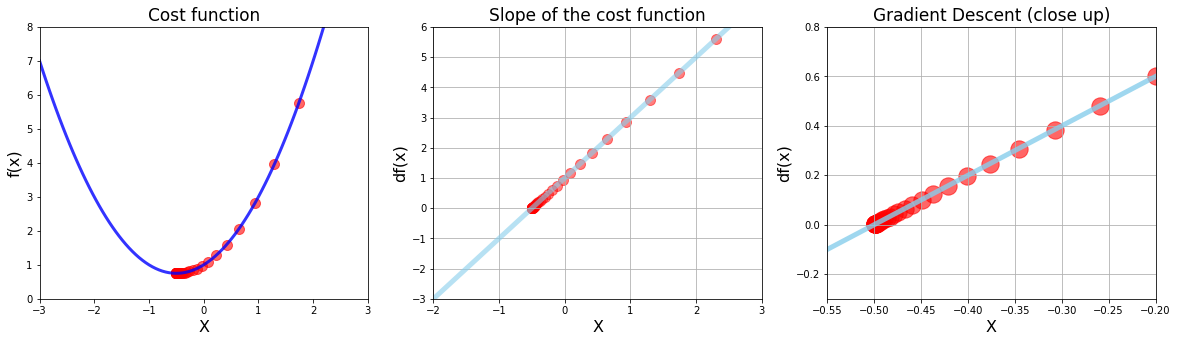

In [10]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim([-3, 3])
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.grid()
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.grid()
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)

plt.show()

## Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [11]:
# Generate second set of data
x_2 = np.linspace(start=-2, stop=2, num=1000)

def g(x):
    return x**4 - 4 * x**2 + 5

def dg(x):
    return 4 * x**3 - 8 * x

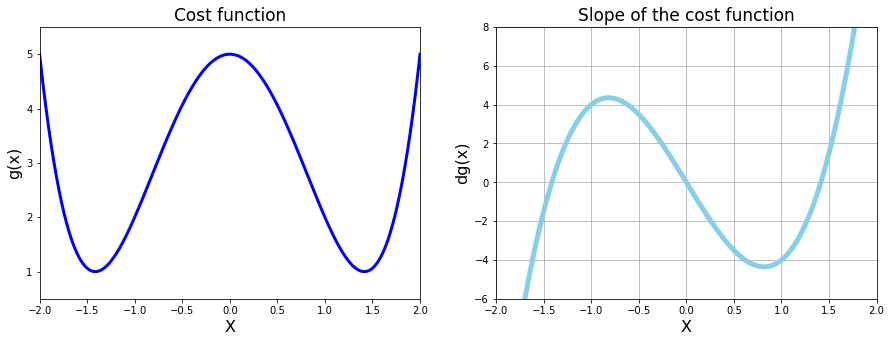

In [13]:
# Plot function and derivative side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
# subplot(no_of_row, no_of_col, index)
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.grid()
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent as a Python Function

In [43]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        step_size = abs(new_x - previous_x)
        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [19]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.5, 
                                                 multiplier=0.02, precision=0.001)
print('Local min occurs at: ', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at:  1.4122375085019094
Number of steps:  23


In [24]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5, 
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at: ', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at:  -1.4137636556157256
Number of steps:  56


In [22]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)
print('Local min occurs at: ', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at:  -1.4120887490901561
Number of steps:  34


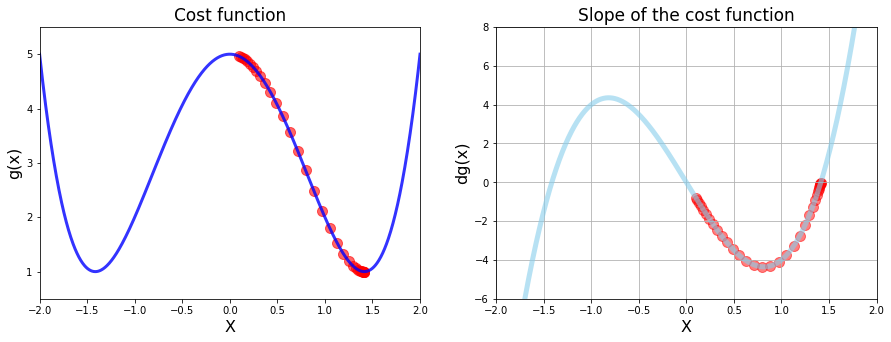

In [31]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.1)

# Plot function, derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
# subplot(no_of_row, no_of_col, index)
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.grid()
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

## Example 3 - Divergence, Overflow and Python Tuples
## $$h(x) = x^5 - 2x^4 + 2$$

In [34]:
# Generate data
x_3 = np.linspace(start=-2.5 , stop=2.5 ,num=1000)

def h(x):
    return x**5 - 2 * x**4 + 2

def dh(x):
    return 5 * x **4 - 8 * x**3

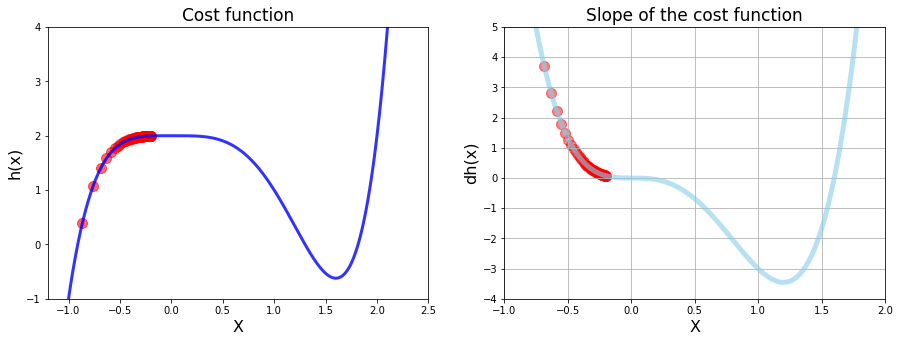

Local min occurs at:  -2071072.4470816324
Cost at this minimum is:  -3.810455326061589e+31
Number of steps:  71


In [47]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2, max_iter=70)

# Plot function, derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
# subplot(no_of_row, no_of_col, index)
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)

plt.grid()
plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Local min occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))

In [50]:
import sys

sys.version
type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

In [57]:
# Creating a tuple - tuple packing
breakfast = 'waffles', 'soy bean', 'eggs'
unlucky_numbers = 13, 4, 9, 26, 17

# Access a value in a tuple
print('I love ', breakfast[0])
print('My hotel has no ' + str(unlucky_numbers[1]) + 'th floor')

# Tuple: use with different types of data, immutable
not_my_address = 1, 'Granville St', 'Vancouver', 45000

tuple_with_single_value = 42,
type(tuple_with_single_value)

main, beverage, protein = breakfast
print('Main course is ' + main)

data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is ', data_tuple[0])
print('Cost at the last x value is ', h(data_tuple[0]))
print('Number of steps is ', len(data_tuple[1]))

I love  waffles
My hotel has no 4th floor
Main course is waffles
Local min is  1.5989534547394717
Cost at the last x value is  -0.6214287992331258
Number of steps is  117


## The Learning Rate

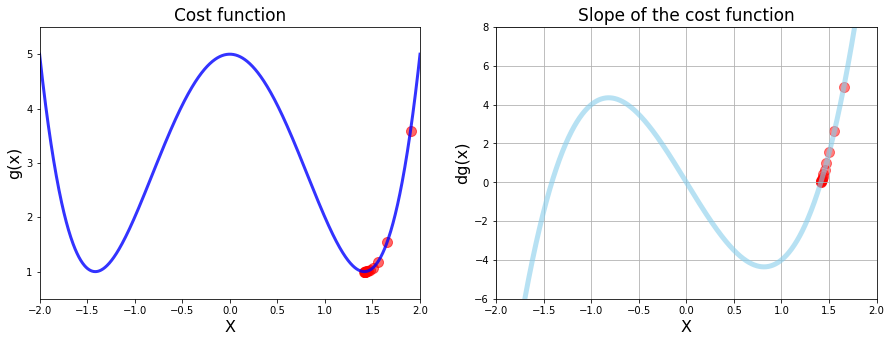

Number of steps:  14


In [62]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                                 multiplier=0.02, max_iter=500)

# Plot function, derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
# subplot(no_of_row, no_of_col, index)
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.grid()
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps: ', len(list_x))

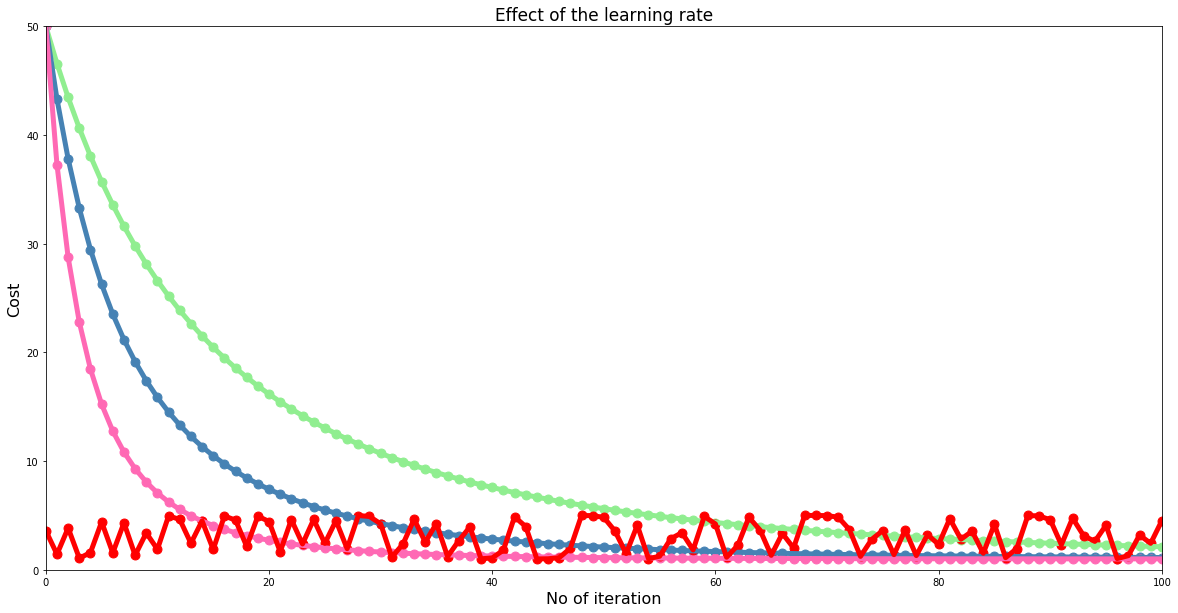

In [78]:
# Run gradient descent 3 times
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                             multiplier=0.0005, precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                             multiplier=0.001, precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                              multiplier=0.002, precision=0.0001, max_iter=n)

# Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                multiplier=0.25, precision=0.0001, max_iter=n)

# Plot reduction in cost for each iteration
plt.figure(figsize=[20, 10])

# 1 Chart: Low learning rate
plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('No of iteration', fontsize=16)
plt.ylabel('Cost', fontsize=16)

low_values = np.array(low_gamma[1])
iteration_list = list(range(0, n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

# Plotting mid learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', s=80)

# Plotting high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='hotpink', s=80)

# Plotting insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='red', linewidth=5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='red', s=80)

plt.show()